In [1]:
#판독문 [findings], [diagnosis]을 합쳐 전처리 진행  

In [2]:
# 한글을 영어로 번역
# 인덱스: 11,14,27,65,72,94,126,136,169,172,221,241,257,294,337,338,341,353,446,453,486,491,544,545,569,614,
#        659,666,689,707,716,718,730,740,749,841,843,848,897,898,906,942,979,1000,1021,1065,1088,
#        1141,1169,1170,1171,1191,1206,1225,1284,1285,1302,1324,1325,1345,1364,1425,1435,1454,1459,1464,
#        1491,1568,1569,1589,1649

In [3]:
import pandas as pd 
import numpy as np
import xlrd
from tqdm import tqdm 

data_dir = "../data/" 
loc = (data_dir + "Thyroid.xlsx")
wb = xlrd.open_workbook(loc)
sheet = wb.sheet_by_index(1)

f = []
d = []
label = []

for i in tqdm(range(1, 1654)): #제목 제외, 라벨 0, 1, 2까지 매겨진 데이터의 개수 
#     if i%100==0: print(i,end=' ')
    finding = sheet.cell_value(i,2)
    finding = str(finding)
    f.append(finding)

    diagnosis = sheet.cell_value(i,3)
    diagnosis = str(diagnosis)
    d.append(diagnosis)
    
    category = sheet.cell_value(i,4)
    category = int(category)
    label.append(category)

report = {"finding" : f, "diagnosis" : d, "label": label}


100%|██████████| 1653/1653 [00:00<00:00, 741199.97it/s]


In [4]:
report

{'finding': ['1999-11-17    NECK SONO\n\n\n\n\n\nTotal thyroidectomy state 임.\n\nNeck 에 뚜렷한 mass 나 비정상적으로 커져 있는 lymph node\n\n없음.\n\nLeft spinal accessory 에 의하여 5mm 정도 크기의 lymph node \n\n가 있음.\n\n\n\n',
  '2000-11-02    NECK SONO\n\n\n\n양측 thyroidectomy 가 되어 있음.\n\nPrevious op. site 는 definite 한 recurrence 의 evidence 보이지 않음.\n\n양측 posterior cervical chain 과 left internal jugular chain 에\n\ndiameter 1cm 미만의 여러개의 small lymph node enlargement 가 보이고 있음.\n\n\n\n',
  '39107.0',
  '41485.0',
  '41516.0',
  '2002-04-04   2002-04-01    NECK SONO\n\nS/P Left thyroidectomy. \n\nRight thyroid 에 focal lesion 의 evidence 없으며 op. bed 에 recur 를 시사할 만한\n\nmass 없으며 neck space 에 significant 한 lymphadenopathy 없음.\n\n\n\n\n\n ',
  '38734.0',
  '41254.0',
  '41599.0',
  '2012-08-08   이전 US상 관찰되던 abnormal fluid collection의 소견 관찰되지 않음.',
  '41530.0',
  '41509.0',
  '41353.0',
  '38651.0',
  '2005-01-12   Total thyroidectomy state 이며 both thyroidectomy site 에 local recurrence 의 evidence 없음.\n\nLeft IJC 를 따라 1.2

In [5]:
import nltk
import re
from nltk.corpus import stopwords

def prepro(sentence):
    sentence = re.sub('[\s]{1,}',' ',sentence) #공백이 두번 이상 중복될 경우 제거 
    sentence = re.sub('[^a-zA-Z]+(cm|mm)','',sentence) #특정 단어 제거
    sentence = re.sub('[0-9][.](?=\s?[a-zA-Z]?[^0-9])','.',sentence) #순서를 표시하는 숫자 제거  
    sentence = re.sub('[0-9]?[.]?[0-9]+(x|X)*','',sentence) #숫자 제거 
    sentence = re.sub('[.]\s*[.]','.',sentence) #특정 특수문자 제거  
    sentence = re.sub('[(x|X)]\s*[(x|X)]','',sentence) #특정 특수문자 제거  
    sentence = re.sub('[\\\/\(\)\<\>\[\]\{\}+\*#$_`%@^!~?;|=:,\-\"\']','',sentence) #특정 특수문자 제거 
    sentence = re.sub('[0-9]{2,}','',sentence) #숫자 제거
    sentence = sentence.lower() #소문자화
    
    rm_list = ["c.i.","same as conclusion","same as the conclusion.","neck sono finding","the","r2","pf",
               "추가판독","추가판독의","판독의","신승의","이웅재","이명석","임유정","강성은","최예라","김지훈","김승호","신화선", "최승홍","seung hong choi", "안수경", "한문희", "염정아"]
    for i in rm_list:
        sentence = sentence.replace(i, '')
    if len(sentence)<=1: sentence = ''
        
    sentence = sentence.lstrip(".")
    sentence = sentence.strip(" ")
    

    return sentence    

In [6]:
clean_report = report.copy()

for key in ["finding", "diagnosis"]:
    for index, value in enumerate(clean_report[key]):
        clean_report[key][index] = prepro(value)

clean_report

{'finding': ['neck sono total thyroidectomy state 임. neck 에 뚜렷한 mass 나 비정상적으로 커져 있는 lymph node 없음. left spinal accessory 정도 크기의 lymph node 가 있음.',
  'neck sono 양측 thyroidectomy 가 되어 있음. previous op. site 는 definite 한 recurrence 의 evidence 보이지 않음. 양측 posterior cervical chain 과 left internal jugular chain 에 diameter 미만의 여러개의 small lymph node enlargement 가 보이고 있음.',
  '',
  '',
  '',
  'neck sono sp left thyroidectomy. right thyroid 에 focal lesion 의 evidence 없으며 op. bed 에 recur 를 시사할 만한 mass 없으며 neck space 에 significant 한 lymphadenopathy 없음.',
  '',
  '',
  '',
  '이전 us상 관찰되던 abnormal fluid collection의 소견 관찰되지 않음.',
  '',
  '',
  '',
  '',
  'total thyroidectomy state 이며 both thyroidectomy site 에 local recurrence 의 evidence 없음. left ijc size 로 measure 되는 enlarged lymph node 가 있음.',
  '',
  '',
  '',
  'sp right thyroidectomy. left lobe 및 right thyroidectomy site 에 definite 한 recur 시사할 만한 nodular lesion 없음. 양측 neck 미만의 small lymph node 들이 보이고 있으나 모두 fatty hilum intact 함.',
  '',
  'thyroid

In [7]:
# #한글+영어 토큰 -> 한글 영어 white space를 첨가하여 떼주기  
# #한글 -> 어근만 추출하기 
# def insertChar(mystring, position):
#     add = 0
#     for i in range(len(position)):
#         position[i]+=add
#         add+=1
#     for i in position: 
#         mystring   =  mystring[:i+1] + ' ' + mystring[i+1:] 
#     return mystring 

# def findEnKo(w):
#     result=[]
#     for index, letter in enumerate(w):
#         if ord('가') <= ord(letter) <= ord('힣'):
#             result.append(0)
#         elif ord('a') <= ord(letter) <= ord('z'):
#             result.append(1)
#         elif letter == '.':
#             result.append(2)
#     jump_index=[]
#     for i in range(len(result)-1):
#         if result[i] != result[i+1]: jump_index.append(i)     
#     if len(jump_index) ==0 : return w
#     else: return insertChar(w,jump_index)
            
# def whiteSpace(sent):
#     tokens = sent.split()
#     result=[]    
#     for w in tokens:
#         #만약 w 가 한글+영어 토큰이면 서로 떼어주기 
#         word = findEnKo(w)
#         result.append(word)
        
#     return ' '.join(result)
        

In [8]:
# whiteSpace(  'neck sono finding total thyroidectomy를 시행받은 환자로 op. bed에 이상 소견은 보이지 않음. right jugulodigastric area에 long diameter으로 measure 되는 ln가 보이고 있으며 right internal jugular chain에도 long diameter으로 measure 되는 ln가 보이고 있음. left internal jugular chain에 long diameter으로 measure 되는 ln가 보이고 있음. usg와 비교하였을 때 의미있는 크기 증가는 보이지 않음.')

In [9]:
# extracted_report = clean_report.copy()

# for key in ["finding", "diagnosis"]:
#     for index, value in enumerate(extracted_report[key]):
#         extracted_report[key][index] = whiteSpace(value)

# extracted_report

In [10]:
#komoran 사용 이유 : 분석 불능 범주 NA 태그를 이용할 수 있음.  
import konlpy
import re
from eunjeon import Mecab 
from konlpy.tag import Komoran 

JEX = ['JKS','JKC','JKG','JKO','JKB','JKV','JKQ','JX','JC',
       'EP','EF','EC','ETN','ETM',
       'XPN','XSN','XSV','XSA']

def extract_real_tag(w): #조사 접사 어미 제외하고 추출하는 함수  
    komoran = Komoran()
    extracted_list = []
    pos = komoran.pos(w)
    #print(pos)
    for p in pos:
        if p[1] in JEX: continue
        else: extracted_list.append(p[0])
    return ' '.join(extracted_list)

In [11]:
extract_real_tag('neck sono 양측 thyroidectomy state임. preop.site에 definite한 recurrent mass 의 evidence 없음 . left submandibular lymph node diameter 정도로 측정되고 round한 configuration을 보이고 있어서 그 임상적 의미를 알 수 없음 . 양측 internal jugular chain을 따라서 diameter 미만의 small benign looking lymph node가 있음.')

'neck sono 양측 thyroidectomy state 임 . preop . site definite 한 recurrent mass 의 evidence 없 . left submandibular lymph node diameter 정도 측정 round 한 configuration 보이 있 그 임상 의미 알 수 없 . 양측 internal jugular chain 따라서 diameter 미만 small benign looking lymph node 있 .'

In [12]:
extracted_report = clean_report.copy()

for key in ["finding", "diagnosis"]:
    for index, value in enumerate(extracted_report[key]):
        if index%100==0: print(index,end=' ')
        extracted_report[key][index] = extract_real_tag(value)

extracted_report

0 

KeyboardInterrupt: 

In [ ]:
# 표제어 제거 
#tensorflow 1.14.0 -> tensorflow 2.2 or higher
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

def lem(sent):
    lemma = WordNetLemmatizer()
    tokens = sent.split()
    result=[]    
    for w in tokens:
        if len(w)>2:
            w2 = lemma.lemmatize(w)
            result.append(w2)
            if w!=w2: print( w, '\t', w2)
        else : result.append(w)
    
    return ' '.join(result)

In [ ]:
final_report = extracted_report.copy()

for key in ["finding", "diagnosis"]:
    for index, value in enumerate(final_report[key]):
        final_report[key][index] = lem(value)

In [ ]:
final_report

# hyper parameter를 정하기 위한 통계 

In [ ]:
total = len(final_report['label'])
class0 = final_report['label'].count(0)
class1 = final_report['label'].count(1)
class2 = final_report['label'].count(2)
print("총 데이터 개수:", total)
print("class 0 개수: %d, 비율: %.2f"%(class0, class0/total))
print("class 1 개수: %d, 비율: %.2f"%(class1, class1/total))
print("class 2 개수: %d, 비율: %.2f"%(class2, class2/total))

In [ ]:
finding_0 = final_report['finding'].count('')
print("finding 비어있는 데이터 비율: %.2f"%(finding_0/len(final_report['finding'])))

In [ ]:
import matplotlib.pyplot as plt
#finding과 diagnosis를 합친 길이로 계산. 
len_result = [len(final_report['finding'][s].split())+len(final_report['diagnosis'][s].split()) for s in range(total)]


plt.clf() #clear previous figure
plt.hist(len_result,bins=100)
plt.title('Distribution of length')
plt.xlabel('length')
plt.ylabel('number')
plt.savefig('words_distrib1.png', bbox_inches='tight')
plt.show()

print('entry의 최대 사용 단어 수 : {}'.format(np.max(len_result)))
print('entry의 평균 사용 단어 수 : {:.2f}'.format(np.mean(len_result)))
print('entry의 중앙값 사용 단어 수: {:.2f}'.format(np.median(len_result)))

In [ ]:
#finding, diagnosis 합치기 -> 데이터 프레임 생성
"""
    두 문장이 들어오고 max_length가 주어졌을 때, 두 문장의 길이를 공평하게 맞추어 truncate하고자 함. 
    1) 합친 문장이 max_length보다 작을 때 -> 종료 
    2) 첫 문장이 두번째 문장보다 길때 -> 첫 문장에서 맨 뒤 토큰 하나 없애기 
    3) 두번째 문장이 첫 문장보다 길때 -> 두번째 문장에서 맨 뒤 토큰 하나 없애기 
    -> max_length에 도달할 때까지 무한 반복. 
"""

def bind_df(finding, diagnosis, max_length):
    a = finding.split()
    b = diagnosis.split()
    while True:
        total_length = len(a) + len(b)
        if total_length <= max_length:
            break
        if len(a) > len(b):
            a.pop() #pop() 안에 index argument가 없으면 맨 뒤의 것을 없앤다. 
        else:
            b.pop()  
            
    return ' '.join(a+b)
    

In [ ]:
max_len = 100
text=[]
for index in range(total):
    bind = bind_df(final_report["finding"][index], final_report["diagnosis"][index], max_len)
    text.append(bind)

In [ ]:
text

In [ ]:
d = {'text': np.array(text), 'label' : np.array(final_report["label"])}
df = pd.DataFrame(d)

#중복 없애기
df.drop_duplicates(subset=['text'], inplace=True)
#결측값 없애기 
df.dropna(inplace=True)
df = df.reset_index(drop=True)
print("전체 샘플수 :", len(df))

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

In [ ]:
# df.to_csv(data_dir + 'Thyroid_bind.tsv', index=False, header=True, sep='\t')

In [14]:
# df = pd.read_csv('../data/Thyroid_bind.tsv', sep='\t')

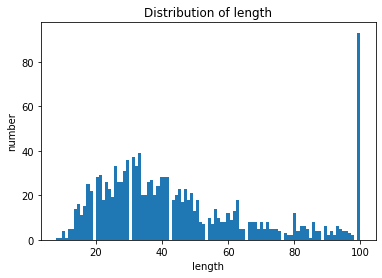

entry의 최대 사용 단어 수 : 100
entry의 평균 사용 단어 수 : 45.61
entry의 중앙값 사용 단어 수: 39.00


In [16]:
import matplotlib.pyplot as plt
len_result = [len(s.split()) for s in df['text']]

plt.clf() #clear previous figure
plt.hist(len_result,bins=100)
plt.title('Distribution of length')
plt.xlabel('length')
plt.ylabel('number')
plt.savefig('words_distrib2.png', bbox_inches='tight')
plt.show()

print('entry의 최대 사용 단어 수 : {}'.format(np.max(len_result)))
print('entry의 평균 사용 단어 수 : {:.2f}'.format(np.mean(len_result)))
print('entry의 중앙값 사용 단어 수: {:.2f}'.format(np.median(len_result)))

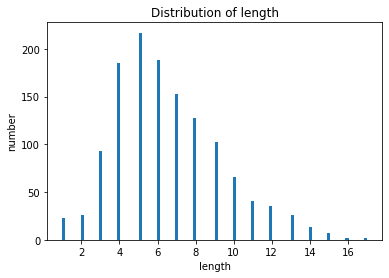

entry의 최대 사용 문장 수 : 17
entry의 평균 사용 문장 수 : 6.54
entry의 중앙값 사용 문장 수: 6.00


In [17]:

len_result = [len(s.split('.'))  for s in df['text']]

plt.clf() #clear previous figure
plt.hist(len_result, bins=100)
plt.title('Distribution of length')
plt.xlabel('length')
plt.ylabel('number')
plt.savefig('sentences_distrib.png', bbox_inches='tight')
plt.show()

print('entry의 최대 사용 문장 수 : {}'.format(np.max(len_result)))
print('entry의 평균 사용 문장 수 : {:.2f}'.format(np.mean(len_result)))
print('entry의 중앙값 사용 문장 수: {:.2f}'.format(np.median(len_result)))

In [ ]:
total = len(df['label'])
class0 = sum(df['label']==0)
class1 = sum(df['label']==1)
class2 = sum(df['label']==2)
print("총 데이터 개수:", total)
print("class 0 개수: %d, 비율: %.2f"%(class0, class0/total))
print("class 1 개수: %d, 비율: %.2f"%(class1, class1/total))
print("class 2 개수: %d, 비율: %.2f"%(class2, class2/total))

In [ ]:
#최대 사용 단어 수 100
# 최대 사용 문장 수 10